In [1]:
import os.path as op

from utils import plot_meta_maps

# Neurosynth

## Term-based Meta-Analysis

In [2]:
result_dir = op.abspath("../results")
output_dir = op.join(result_dir, "gradient_decoding")

/Users/jperaza/Documents/envs/gradec_env/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


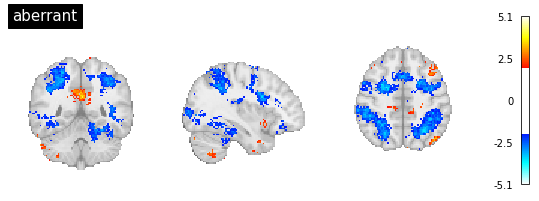

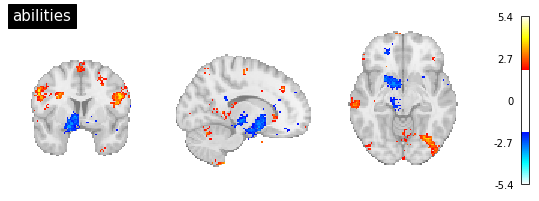

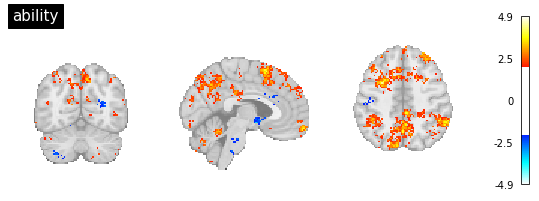

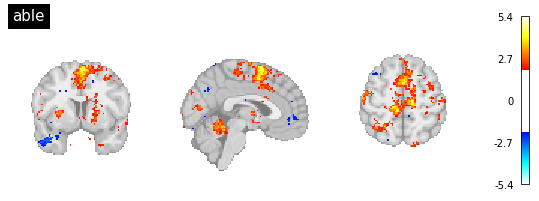

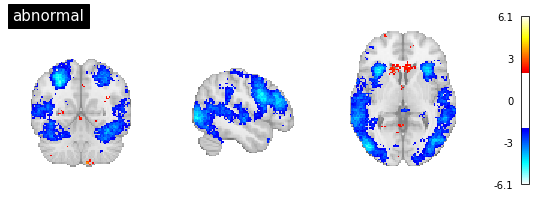

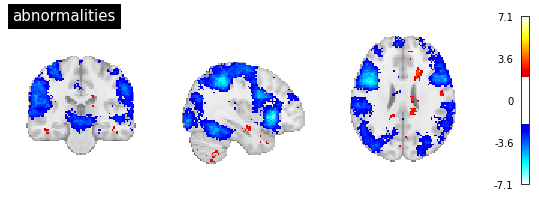

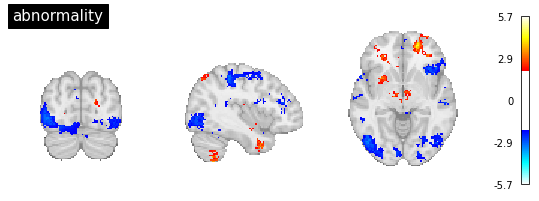

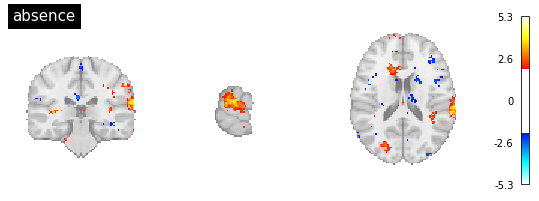

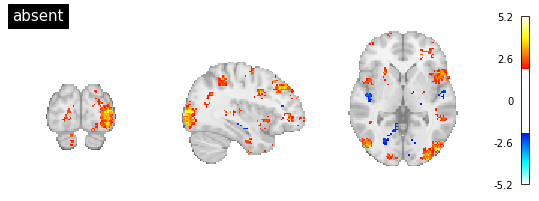

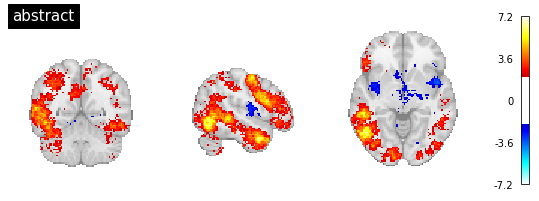

In [3]:
term_based_ns_decoder_fn = op.join(output_dir, f"term-based_neurosynth_decoder.pkl.gz")
# For Neurosynth n_init=60, to plot features with names
plot_meta_maps(term_based_ns_decoder_fn, n_init=60)

## LDA-based Meta-Analysis

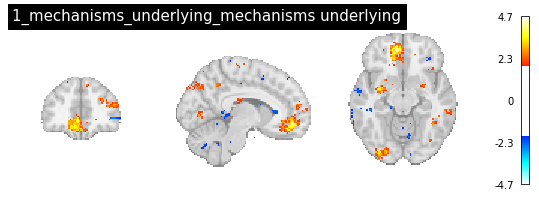

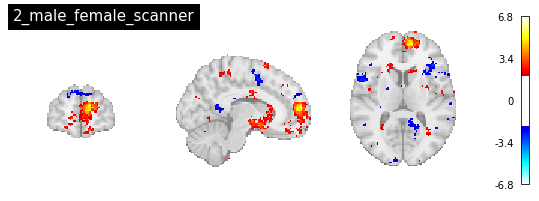

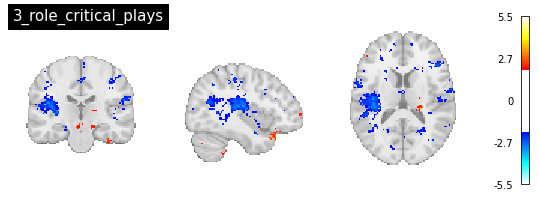

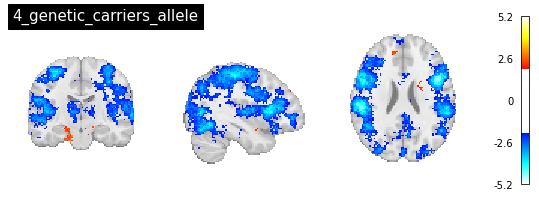

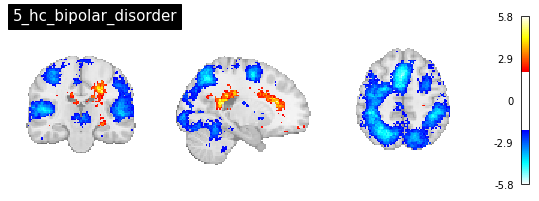

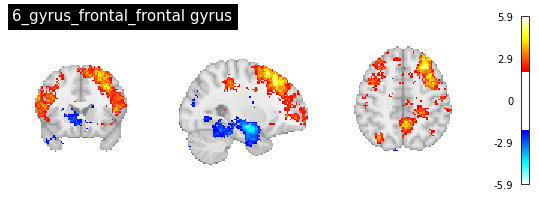

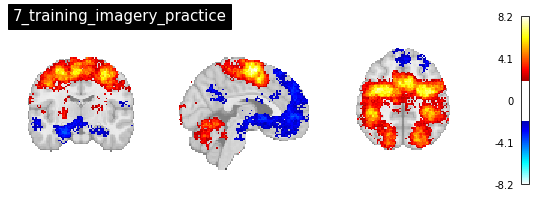

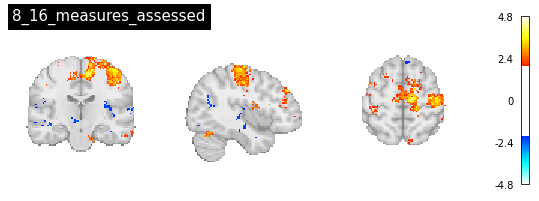

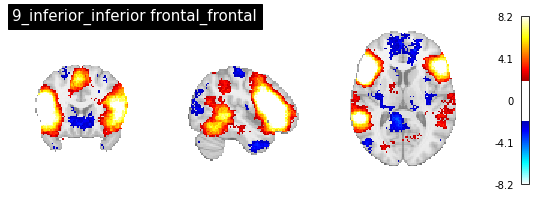

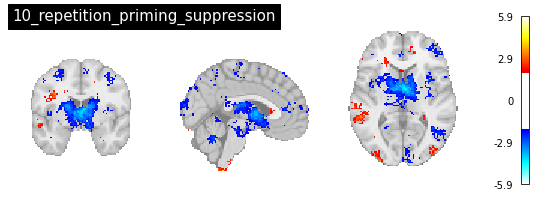

In [4]:
lda_based_ns_decoder_fn = op.join(output_dir, f"lda-based_neurosynth_decoder.pkl.gz")
plot_meta_maps(lda_based_ns_decoder_fn)

# NeuroQuery

## Term-based Meta-Analysis

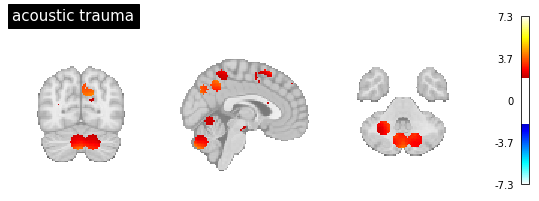

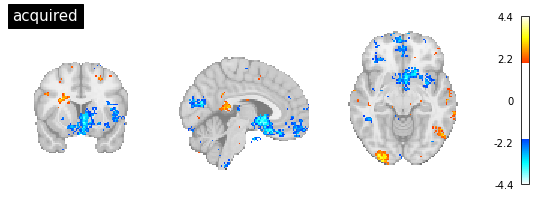

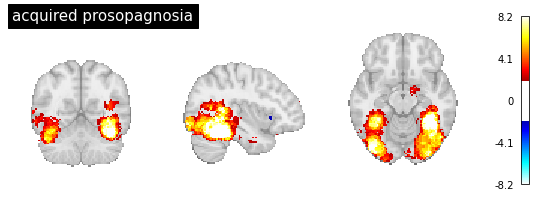

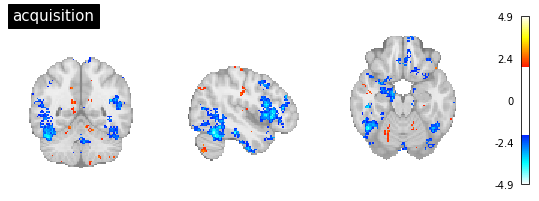

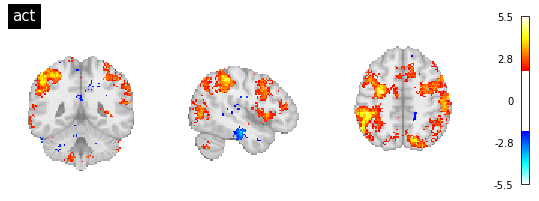

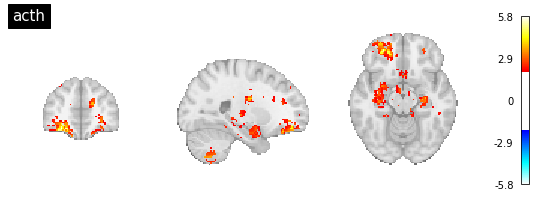

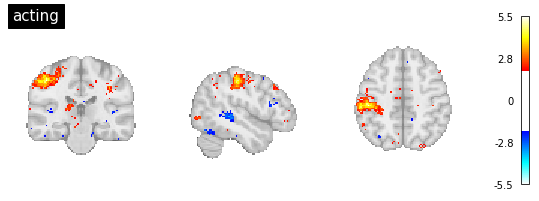

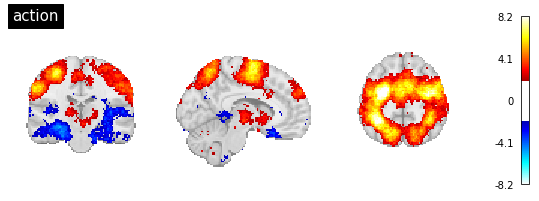

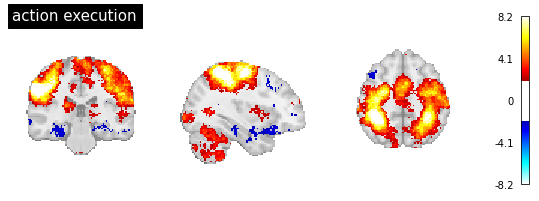

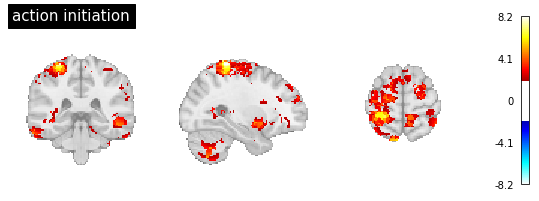

In [5]:
term_based_nq_decoder_fn = op.join(output_dir, f"term-based_neuroquery_decoder.pkl.gz")
# For NeuroQuery n_init=60, to plot features with names
plot_meta_maps(term_based_nq_decoder_fn, n_init=60)

## LDA-based Meta-Analysis

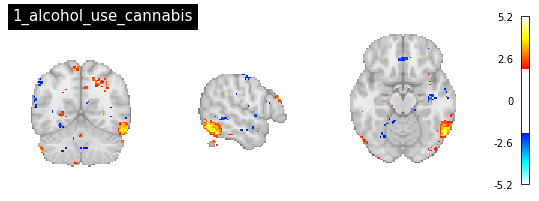

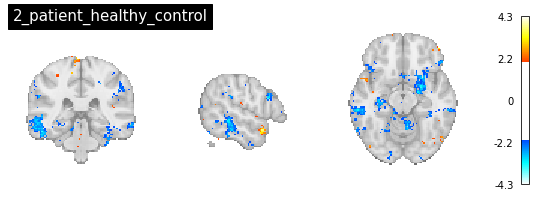

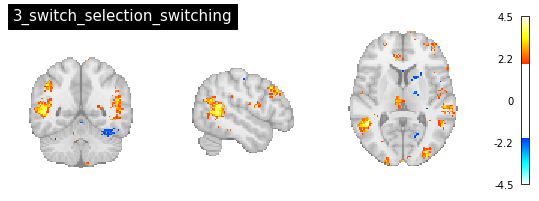

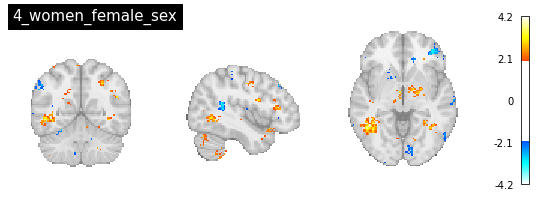

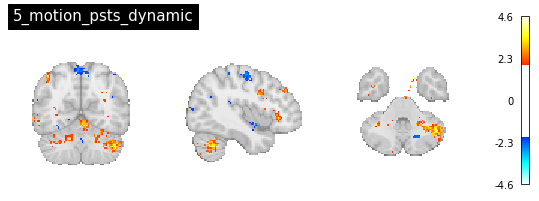

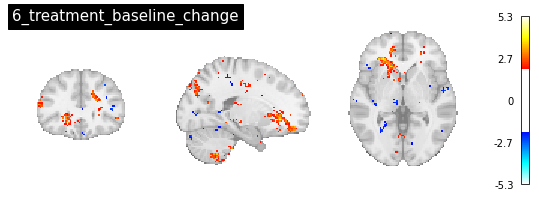

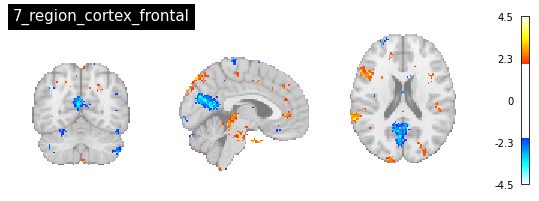

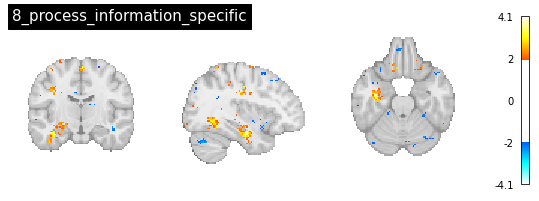

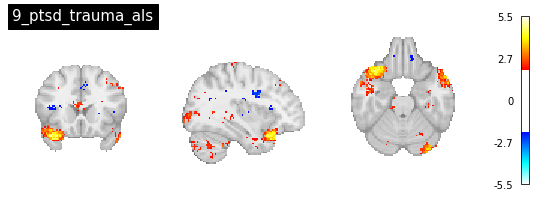

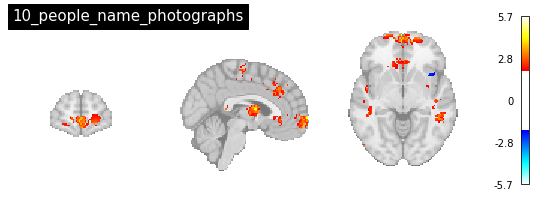

In [6]:
lda_based_nq_decoder_fn = op.join(output_dir, f"lda-based_neuroquery_decoder.pkl.gz")
plot_meta_maps(lda_based_nq_decoder_fn)